**Image background subtraction** [link](https://github.com/AayushG159/Plant-Leaf-Identification/blob/master/background_subtract_camera_capture_leaf_file.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

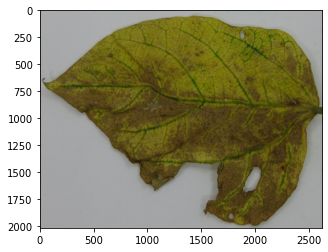

In [6]:
test_img_path = '/content/drive/My Drive/datasets/VM_data_65_25_10/VM_train/severe/severe (52).jpg'

main_img = cv2.imread(test_img_path)
img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
plt.imshow(img,cmap="Greys_r")

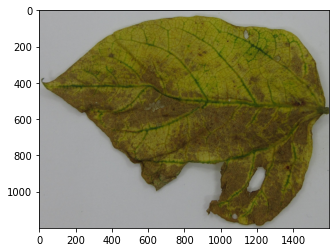

In [7]:
resized_image = cv2.resize(img, (1600, 1200))
plt.imshow(resized_image, cmap="Greys_r")

In [17]:
print(type(img))

print(img.shape)

<class 'numpy.ndarray'>
(2017, 2617, 3)


In [21]:
print(img[0][0][0])

169


In [22]:
y, x, _ = img.shape

In [24]:
gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)

print(gs.shape)

(1200, 1600)


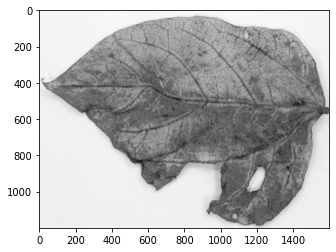

In [25]:
plt.imshow(gs, cmap="Greys_r")

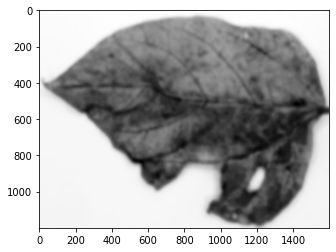

In [30]:
blur = cv2.GaussianBlur(gs, (55,55), 0)
plt.imshow(blur, cmap="Greys_r")

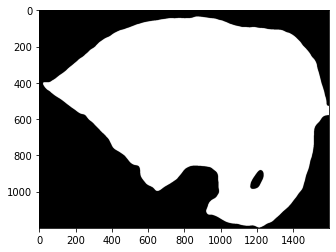

In [32]:
ret_otsu, im_bw_otsu = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

In [34]:
kernel = np.ones((50,50), np.uint8)

print(kernel.shape)

(50, 50)


In [ ]:
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

print(closing)

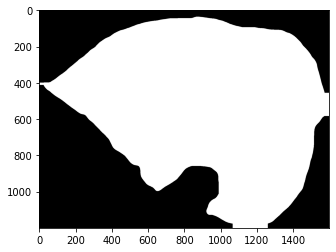

In [35]:
kernel = np.ones((50,50),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap="Greys_r")

In [ ]:
print(closing.shape)
# contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(im_bw_otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

(1200, 1600)


In [ ]:
len(contours)

2

In [ ]:
def find_contour(cnts):
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in cnts:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    print(contains)
    return val[0]

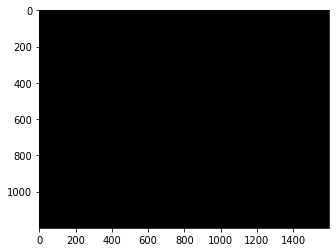

In [ ]:
black_img = np.empty([1200,1600,3],dtype=np.uint8)
black_img.fill(0)
plt.imshow(black_img, cmap = "Greys_r")

[1.0, -1.0]


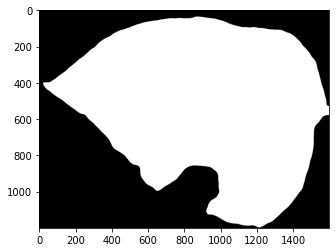

In [ ]:
index = find_contour(contours)
cnt = contours[index]
mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
plt.imshow(mask)

In [ ]:
maskedImg = cv2.bitwise_and(resized_image, mask)

In [ ]:
white_pix = [255,255,255]
black_pix = [0,0,0]

final_img = maskedImg
h,w,channels = final_img.shape
for x in range(0,w):
    for y in range(0,h):
        channels_xy = final_img[y,x]
        if all(channels_xy == black_pix):    
            final_img[y,x] = white_pix

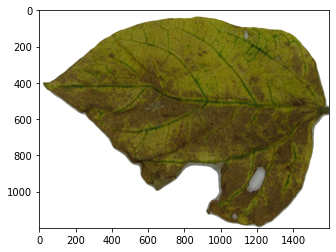

In [ ]:
plt.imshow(maskedImg)

(3888, 5184, 3)
3888
5184
3


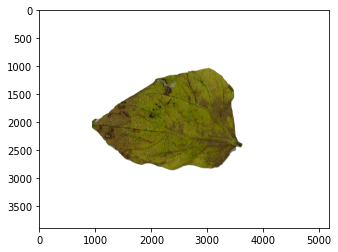

In [ ]:

# same size image
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob
%matplotlib inline

def seg_out_img_same_size(img_path):
    main_img = cv2.imread(img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img,cmap="Greys_r")

    # resized_image = cv2.resize(img, (1600, 1200)) 
    # plt.imshow(resized_image,cmap="Greys_r")

    y,x,_ = img.shape

    # gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # plt.imshow(gs, cmap="Greys_r")

    blur = cv2.GaussianBlur(gs, (55,55),0)
    # plt.imshow(blur, cmap="Greys_r")

    ret_otsu, im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # plt.imshow(im_bw_otsu,cmap='Greys_r')

    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    # plt.imshow(closing, cmap="Greys_r")

    # print(closing.shape)
    contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # len(contours)

    def find_contour(cnts):
        contains = []
        # y_ri,x_ri, _ = resized_image.shape
        y_ri,x_ri, _ = img.shape
        for cc in cnts:
            yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
            contains.append(yn)

        val = [contains.index(temp) for temp in contains if temp>0]
        # print(contains)
        return val[0]

    black_img = np.empty([y,x,3],dtype=np.uint8)
    black_img.fill(0)
    # plt.imshow(black_img, cmap = "Greys_r")

    index = find_contour(contours)
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    # plt.imshow(mask)

    # maskedImg = cv2.bitwise_and(resized_image, mask)
    maskedImg = cv2.bitwise_and(img, mask)

    white_pix = [255,255,255]
    black_pix = [0,0,0]

    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):    
                final_img[y,x] = white_pix

    # plt.imshow(maskedImg)
    return final_img

#----------------------------------------------------
test_img_path = '/content/drive/My Drive/datasets/alien_test_leaves_ori/severe/1.jpg'
img = seg_out_img_same_size(test_img_path)
plt.imshow(img)

In [ ]:

# resized image
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob
%matplotlib inline

def seg_out_img(img_path):
    main_img = cv2.imread(img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img,cmap="Greys_r")

    resized_image = cv2.resize(img, (1600, 1200)) 
    # plt.imshow(resized_image,cmap="Greys_r")

    y,x,_ = img.shape

    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    # plt.imshow(gs, cmap="Greys_r")

    blur = cv2.GaussianBlur(gs, (55,55),0)
    # plt.imshow(blur, cmap="Greys_r")

    ret_otsu, im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # plt.imshow(im_bw_otsu,cmap='Greys_r')

    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    # plt.imshow(closing, cmap="Greys_r")

    # print(closing.shape)
    contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # len(contours)

    def find_contour(cnts):
        contains = []
        y_ri,x_ri, _ = resized_image.shape
        for cc in cnts:
            yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
            contains.append(yn)

        val = [contains.index(temp) for temp in contains if temp>0]
        # print(contains)
        return val[0]

    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    # plt.imshow(black_img, cmap = "Greys_r")

    index = find_contour(contours)
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    # plt.imshow(mask)

    maskedImg = cv2.bitwise_and(resized_image, mask)

    white_pix = [255,255,255]
    black_pix = [0,0,0]

    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):    
                final_img[y,x] = white_pix

    # plt.imshow(maskedImg)
    return final_img

#----------------------------------------------------
# test_img_path = '/content/drive/My Drive/datasets/alien_test_leaves_ori/mix_test/2.jpg'
# img = seg_out_img(test_img_path)
# plt.imshow(img)

In [ ]:
# run the above function and the code
from google.colab.patches import cv2_imshow
from tqdm import tqdm
pathImages = '/content/drive/My Drive/test_input/*'
filename = [img for img in glob.glob(pathImages)]
pathToSave = '/content/drive/My Drive/test_output/'

count = 1
for img_path in tqdm(filename):
  img = seg_out_img(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  head, tail = os.path.split(img_path)
  cv2.imwrite(pathToSave + tail, img) # if need same name
  # cv2.imwrite(pathToSave + str(count) + ".jpg", img) # if need counting names
  count = count + 1
print(count-1)

  0%|          | 0/8 [00:00<?, ?it/s]

(3873, 3873, 3)
3873
3873
3


 12%|█▎        | 1/8 [00:59<06:53, 59.12s/it]

(3873, 3873, 3)
3873
3873
3


 25%|██▌       | 2/8 [01:58<05:54, 59.10s/it]

(5202, 5750, 3)
5202
5750
3


 38%|███▊      | 3/8 [03:40<06:00, 72.16s/it]

(2762, 2762, 3)
2762
2762
3


 50%|█████     | 4/8 [04:11<03:58, 59.60s/it]

(2830, 2830, 3)
2830
2830
3


 62%|██████▎   | 5/8 [04:43<02:33, 51.32s/it]

(3184, 4816, 3)
3184
4816
3


 75%|███████▌  | 6/8 [05:37<01:44, 52.34s/it]

(2830, 2830, 3)
2830
2830
3


 88%|████████▊ | 7/8 [06:10<00:46, 46.57s/it]

(2830, 2830, 3)
2830
2830
3


100%|██████████| 8/8 [06:44<00:00, 50.51s/it]

8


In [ ]:
# to check size of the images
pathImages = '/content/drive/My Drive/test_output/*'
filename = [img for img in glob.glob(pathImages)]
for img_path in filename:
  img = cv2.imread(img_path)
  x = img.shape
  print(x)

(1200, 1600, 3)


In [ ]:
# to find the number of files and size of a directory
import os, os.path

DIR = '/content/drive/My Drive/datasets/alien_test_leaves_seg/healthy'

# Number of files
print("total Files", len([iq for iq in os.scandir(DIR)]))

# Total size of the Directory
total_size = 0
start_path = DIR  # To get size of current directory
for path, dirs, files in os.walk(start_path):
    for f in files:
        fp = os.path.join(path, f)
        total_size += os.path.getsize(fp)
print("Directory size: " + str(total_size/(1024*1024)))

total Files 96
Directory size: 15.173181533813477
